In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
import PIL
import shutil

In [2]:
# 기본 경로
base_dir = 'C:\\vsCode\PillProject\image\color\\'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 이미지 경로
train_red_dir = os.path.join(train_dir, 'red')
train_green_dir = os.path.join(train_dir, 'green')
train_blue_dir = os.path.join(train_dir, 'blue')
train_orange_dir = os.path.join(train_dir, 'orange')
train_white_dir = os.path.join(train_dir, 'white')

# 검증용 이미지 경로
validation_white_dir = os.path.join(validation_dir, 'white')
validation_red_dir = os.path.join(validation_dir, 'red')
validation_green_dir = os.path.join(validation_dir, 'green')
validation_orange_dir = os.path.join(validation_dir, 'orange')
validation_blue_dir = os.path.join(validation_dir, 'blue')

# 테스트용 이미지 경로
test_white_dir = os.path.join(test_dir, 'white')
test_red_dir = os.path.join(test_dir, 'red')
test_green_dir = os.path.join(test_dir, 'green')
test_orange_dir = os.path.join(test_dir, 'orange')
test_blue_dir = os.path.join(test_dir, 'blue')

# 훈련용 이미지 파일 이름 조회
train_white_fnames = os.listdir(train_white_dir)
train_red_fnames = os.listdir(train_red_dir)
train_green_fnames = os.listdir(train_green_dir)
train_orange_fnames = os.listdir(train_orange_dir)
train_blue_fnames = os.listdir(train_blue_dir)
print(train_white_fnames)
print(train_red_fnames)
print(train_green_fnames)
print(train_orange_fnames)
print(train_blue_fnames)

['pill0.jpg', 'pill1.jpg', 'pill10.jpg', 'pill11.jpg', 'pill12.jpg', 'pill13.jpg', 'pill14.jpg', 'pill15.jpg', 'pill16.jpg', 'pill17.jpg', 'pill18.jpg', 'pill19.jpg', 'pill2.jpg', 'pill20.jpg', 'pill21.jpg', 'pill22.jpg', 'pill23.jpg', 'pill24.jpg', 'pill25.jpg', 'pill26.jpg', 'pill27.jpg', 'pill28.jpg', 'pill29.jpg', 'pill3.jpg', 'pill30.jpg', 'pill31.jpg', 'pill32.jpg', 'pill33.jpg', 'pill34.jpg', 'pill35.jpg', 'pill36.jpg', 'pill37.jpg', 'pill38.jpg', 'pill39.jpg', 'pill4.jpg', 'pill40.jpg', 'pill41.jpg', 'pill42.jpg', 'pill43.jpg', 'pill44.jpg', 'pill45.jpg', 'pill46.jpg', 'pill47.jpg', 'pill48.jpg', 'pill49.jpg', 'pill5.jpg', 'pill50.jpg', 'pill51.jpg', 'pill52.jpg', 'pill53.jpg', 'pill54.jpg', 'pill55.jpg', 'pill56.jpg', 'pill57.jpg', 'pill58.jpg', 'pill59.jpg', 'pill6.jpg', 'pill60.jpg', 'pill61.jpg', 'pill62.jpg', 'pill63.jpg', 'pill64.jpg', 'pill65.jpg', 'pill66.jpg', 'pill67.jpg', 'pill68.jpg', 'pill69.jpg', 'pill7.jpg', 'pill70.jpg', 'pill71.jpg', 'pill72.jpg', 'pill73.jpg',

In [3]:
# 각 디렉토리별 이미지 개수 확인

print('Total training red images :', len(os.listdir(train_red_dir)))
print('Total training green images :', len(os.listdir(train_green_dir)))
print('Total training blue images :', len(os.listdir(train_blue_dir)))
print('Total training orange images :', len(os.listdir(train_orange_dir)))
print('Total training white images :', len(os.listdir(train_white_dir)))

print('Total validation white images :', len(os.listdir(validation_white_dir)))
print('Total validation red images :', len(os.listdir(validation_red_dir)))
print('Total validation green images :', len(os.listdir(validation_green_dir)))
print('Total validation orange images :', len(os.listdir(validation_orange_dir)))
print('Total validation blue images :', len(os.listdir(validation_blue_dir)))

print('Total test white images :', len(os.listdir(test_white_dir)))
print('Total test red images :', len(os.listdir(test_red_dir)))
print('Total test green images :', len(os.listdir(test_green_dir)))
print('Total test orange images :', len(os.listdir(test_orange_dir)))
print('Total test blue images :', len(os.listdir(test_blue_dir)))

Total training red images : 42
Total training green images : 63
Total training blue images : 79
Total training orange images : 71
Total training white images : 78
Total validation white images : 24
Total validation red images : 18
Total validation green images : 20
Total validation orange images : 19
Total validation blue images : 19
Total test white images : 11
Total test red images : 11
Total test green images : 10
Total test orange images : 11
Total test blue images : 10


ValueError: num must be 1 <= num <= 16, not 17

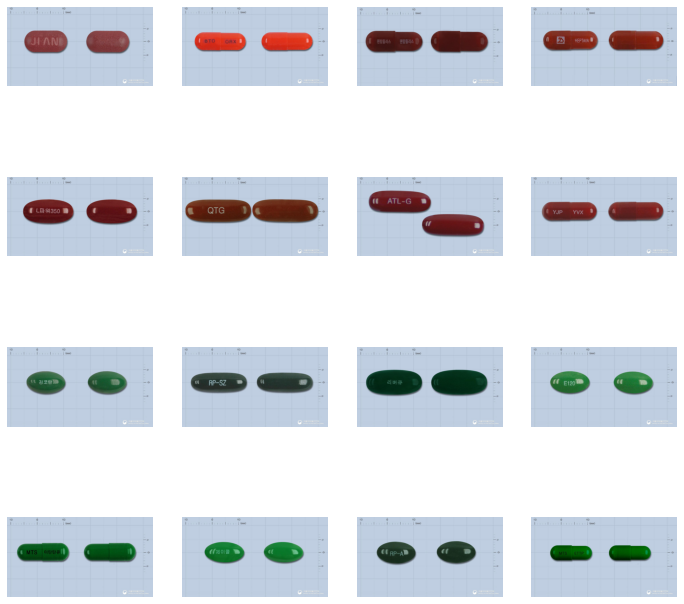

In [4]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_red_pix = [os.path.join(train_red_dir, fname) for fname in train_red_fnames[pic_index-8:pic_index]]
next_green_pix = [os.path.join(train_green_dir, fname) for fname in train_green_fnames[pic_index-8:pic_index]]
next_blue_pix = [os.path.join(train_blue_dir, fname) for fname in train_blue_fnames[pic_index-8:pic_index]]
next_orange_pix = [os.path.join(train_orange_dir, fname) for fname in train_orange_fnames[pic_index-8:pic_index]]
next_white_pix = [os.path.join(train_white_dir, fname) for fname in train_white_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_red_pix + next_green_pix + next_blue_pix + next_orange_pix + next_white_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [5]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [6]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='rgba', # 흑백 이미지 처리
                                                    class_mode='categorical', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='rgba',
                                                              class_mode='categorical', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='rgba',
                                                  class_mode='categorical',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 333 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


In [7]:
# class 확인
train_generator.class_indices

{'blue': 0, 'green': 1, 'orange': 2, 'red': 3, 'white': 4}

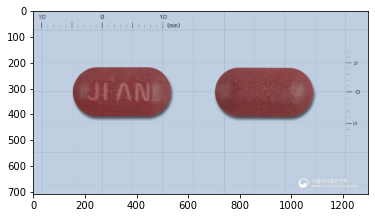

In [8]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_red_pix[0])
plt.imshow(sample_img)
plt.show()

In [9]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

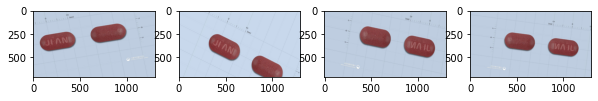

In [10]:
plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [11]:
# 합성곱 신경망 모델 구성하기
#  출력층의 활성화함수로 ‘sigmoid’를 사용
# 0과 1 두 가지로 분류되는 ‘binary’ 분류 문제에 적합하기 때문입
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='sparse_categorical_crossentropy', # 손실 함수로 ‘sparse_categorical_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.



# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

C:\Users\rlawn\AppData\Local\Temp\ipykernel_17308\290144828.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\rlawn\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\rlawn\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\rlawn\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\rlawn\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\rlawn\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\rlawn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\rlawn\AppData\Local\Temp\ipykernel_17308\290144828.py", line 12, in <cell line: 12>
      history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\rlawn\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [16,1] and labels shape [80]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1013]

In [ ]:
# 모델 성능 평가
model.evaluate(train_generator)

In [ ]:
model.evaluate(validation_generator)

In [ ]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 이제 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

# 테스트용  이미지 경로 설정
test_dir = '/content/drive/MyDrive/Colab Notebooks/new/image/test/'
test_blue_dir = os.path.join(test_dir, 'blue/')
test_blue_filenames = os.listdir(test_blue_dir)

test_green_dir = os.path.join(test_dir, 'green/')
test_green_filenames = os.listdir(test_green_dir)

test_orange_dir = os.path.join(test_dir, 'orange/')
test_orange_filenames = os.listdir(test_orange_dir)

test_red_dir = os.path.join(test_dir, 'red/')
test_red_filenames = os.listdir(test_red_dir)

test_white_dir = os.path.join(test_dir, 'white/')
test_white_filenames = os.listdir(test_white_dir)


In [ ]:
# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_color_filenames = {}
dic_color_filenames['blue'] = test_blue_filenames
dic_color_filenames['green'] = test_green_filenames
dic_color_filenames['orange'] = test_orange_filenames
dic_color_filenames['red'] = test_red_filenames
dic_color_filenames['white'] = test_white_filenames


In [ ]:
# O/X 분류 테스트
for ox, filenames in dic_color_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 1, 6
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = image.load_img(path, color_mode='rgba', target_size=(150, 150), interpolation='bilinear')        
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        
        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')

        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();
